In [1]:
from dotenv import load_dotenv
load_dotenv("../config.env")

True

In [2]:
from coamp_graph import Graph
import coamp_graph_notebook_utils
import numpy as np
import matplotlib.pyplot as plt

In [3]:
coamp_graph_notebook_utils.get_all_projects()

['CCLE',
 'COLO320',
 'COLO320 DM & HSR hg38',
 'COLOtest',
 'GBM39',
 'PCAWG',
 'TCGA']

In [4]:
coamp_graph_notebook_utils.get_all_alias()

['655bda68bba7c92509522479',
 '655c060abba7c925095555da',
 'COLO320',
 'COLO320_1',
 'GBM39',
 'ccle',
 'coolest']

In [5]:
project_list = ['655bda68bba7c92509522479', '655c060abba7c925095555da', 'ccle']
df, __ = coamp_graph_notebook_utils.concat_projects(project_list)

In [6]:
df.shape

(5448, 25)

In [ ]:
graph = Graph(df)
nodes = graph.Nodes()
edges = graph.Edges()

In [ ]:
graph.genes_with_no_chr_match_list

In [ ]:
edges[0]

In [ ]:
# P-value/Q-value Distributions by Test Type

In [ ]:
p_single, p_multi_interval, p_multi_chr, p_multi_ecdna = [], [], [], []
q_single, q_multi_interval, q_multi_chr, q_multi_ecdna = [], [], [], []
na_counter = 0
for edge in edges:
    p_vals = edge.get('p_values', [-1, -1, -1, -1])
    q_vals = edge.get('q_values', [-1, -1, -1, -1])
    if p_vals == [-1, -1, -1, -1]:# and edge.get('missing_interval_data'):
        na_counter += 1
    if len(p_vals) == 4:
        p_single.append(p_vals[0])
        p_multi_interval.append(p_vals[1])
        p_multi_chr.append(p_vals[2])
        p_multi_ecdna.append(p_vals[3])
    if len(q_vals) == 4:
        q_single.append(q_vals[0])
        q_multi_interval.append(q_vals[1])
        q_multi_chr.append(q_vals[2])
        q_multi_ecdna.append(q_vals[3])
na_counter

In [ ]:
def every_fifth_percentile(data):
    data = np.array(data)
    percentiles = np.arange(5, 100, 5)
    return {p: np.percentile(data, p) for p in percentiles}

# Calculate the percentiles and format them
def print_percentiles_aligned(data):
    results = every_fifth_percentile(data)

    # Format and find max width for alignment
    formatted = {k: f"{v:.4f}" for k, v in results.items()}
    max_width = max(len(val) for val in formatted.values())

    for k in sorted(formatted):
        print(f"{k:>2}th percentile: {formatted[k]:>{max_width}}")

In [ ]:
def plot_p_values(p_values, title="p_values"):
    filtered = [p for p in p_values if p != -1]
    print(f"{len(filtered)} valid p-values from {len(p_values)} edges\n")
    
    print_percentiles_aligned(filtered)
    
    plt.figure(figsize=(8, 6))
    plt.hist(filtered, bins=50, alpha=0.7)
    plt.title(title)
    plt.xlabel("p-values")
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    


In [ ]:
plot_p_values(p_single, title=f"Single Interval P-Values (T1)")

In [ ]:
plot_p_values(q_single, title=f"Single Interval Q-Values (T1)")

In [ ]:
plot_p_values(p_multi_interval, title=f"Multi Interval P-Values (T2)")

In [ ]:
plot_p_values(q_multi_interval, title=f"Multi Interval Q-Values (T2)")

In [ ]:
# PARAMETER SWEEP FOR MERGING THRESHOLD

In [7]:
# test merge cutoff param
project_list_small = ['COLO320', 'GBM39']
test_df, __ = coamp_graph_notebook_utils.concat_projects(project_list_small)
test_graph = Graph(test_df, merge_cutoff=50000)
print(test_graph.MERGE_CUTOFF)

Retrieved locations for 22998 GRCh38 genes in 0.04 seconds
Loaded 28555 genes from provided reference files
Gene record creation time: 1.28 seconds
31508
Matched location data for 22976 genes
Filtering features took 0.0005 seconds, resulting in 3 features
Preprocessing intervals and reformatting dataset took 0.0014 seconds
Starting CreateNodes with 3 rows
Note: 0 genes are amplified on multiple feature IDs in the same sample
TEST: 40 searches where gene's location is found
TEST: 39 searches where gene's chr on interval and gene's location is matched to an interval
TEST: 1 searches where gene's chr on interval but gene's location is NOT matched to an interval (1 unique nodes)
TEST: 0 searches where gene's chr not on interval (0 unique nodes)
Processing 40 genes took 0.0070 seconds, resulting in 26 unique nodes
0 genes were not amplified on any merged intervals
Total CreateNodes execution: 0.0070 seconds
Starting CreateEdges with 26 nodes
Building features index took 0.0000 seconds: 3 un

In [8]:
tmp_graph = Graph(test_df, merge_cutoff=50000, construct_graph=False)
processed_dataset = tmp_graph.preprocessed_dataset

Retrieved locations for 22998 GRCh38 genes in 0.05 seconds
Loaded 28555 genes from provided reference files
Gene record creation time: 1.15 seconds
31508
Matched location data for 22976 genes
Filtering features took 0.0003 seconds, resulting in 3 features
Preprocessing intervals and reformatting dataset took 0.0010 seconds


In [31]:
def plot_pdD_dist(input_df, ax, merge_cutoff):
    tmp_graph = Graph(input_df, merge_cutoff=merge_cutoff, construct_graph=False)
    processed_dataset = tmp_graph.preprocessed_dataset
  
    lengths = [interval[2] - interval[1] for list in processed_dataset['Merged_Intervals'] for interval in list if interval]

    # add a subplot
    ax.hist(lengths, bins=50, alpha=0.7, color='blue')
    ax.set_title(f'merge_cutoff = {merge_cutoff}bp')
    ax.set_xlabel(f"Interval Lengths (n={len(lengths)})")
    ax.set_ylabel("Frequency")

    # plot mean line
    if lengths:
        adj_mean = sum(lengths) / len(lengths)
        ax.axvline(adj_mean, color='black', linestyle='dashed', linewidth=2, label=f'Mean = {adj_mean:.2f}')
    ax.legend()

Retrieved locations for 22998 GRCh38 genes in 0.03 seconds
Loaded 28555 genes from provided reference files
Gene record creation time: 1.17 seconds
31508
Matched location data for 22976 genes
Filtering features took 0.0020 seconds, resulting in 1119 features
Preprocessing intervals and reformatting dataset took 0.0272 seconds
Retrieved locations for 22998 GRCh38 genes in 0.03 seconds
Loaded 28555 genes from provided reference files
Gene record creation time: 1.20 seconds
31508
Matched location data for 22976 genes
Filtering features took 0.0019 seconds, resulting in 1119 features
Preprocessing intervals and reformatting dataset took 0.0291 seconds
Retrieved locations for 22998 GRCh38 genes in 0.03 seconds
Loaded 28555 genes from provided reference files
Gene record creation time: 1.17 seconds
31508
Matched location data for 22976 genes
Filtering features took 0.0011 seconds, resulting in 1119 features
Preprocessing intervals and reformatting dataset took 0.0272 seconds
Retrieved locati

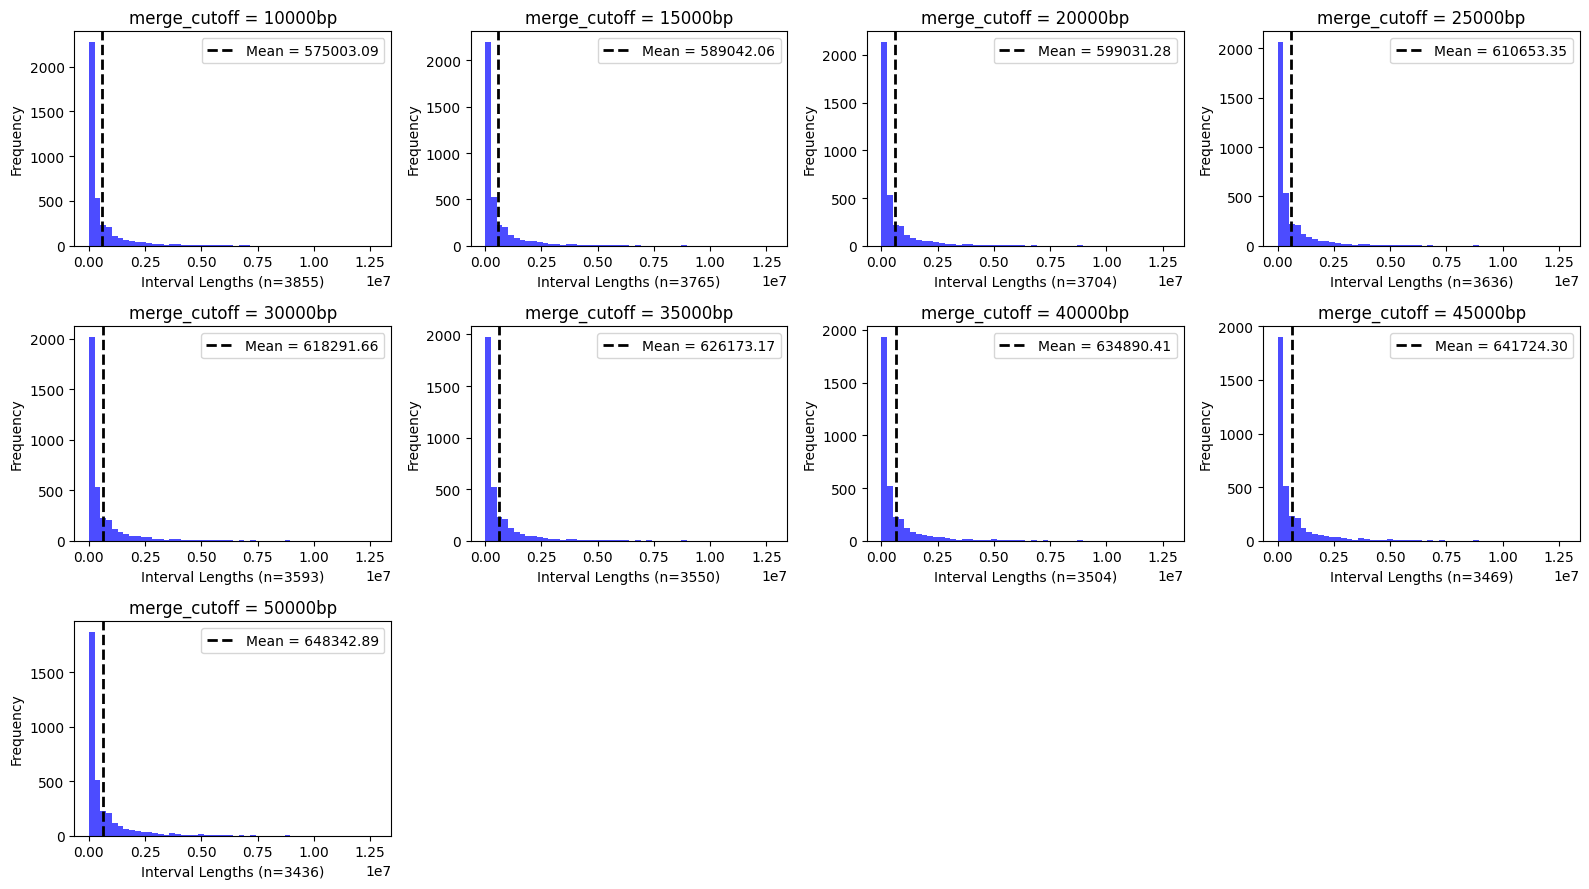

In [32]:
cutoff_values = list(range(10000, 51000, 5000))
num_plots = len(cutoff_values)
cols = 4
rows = (num_plots + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 3 * rows))
axes = axes.flatten() 

for idx, merge_cutoff in enumerate(cutoff_values):
    ax = axes[idx]
    plot_pdD_dist(df, ax, merge_cutoff)

# hide unused subplots if any
for j in range(len(cutoff_values), len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.show()